In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/insurance.csv"
data = pd.read_csv(file_path)

print(data.head(11))


    age     sex   bmi  children smoker     region  expenses
0    19  female  27.9         0    yes  southwest  16884.92
1    18    male  33.8         1     no  southeast   1725.55
2    28    male  33.0         3     no  southeast   4449.46
3    33    male  22.7         0     no  northwest  21984.47
4    32    male  28.9         0     no  northwest   3866.86
5    31  female  25.7         0     no  southeast   3756.62
6    46  female  33.4         1     no  southeast   8240.59
7    37  female  27.7         3     no  northwest   7281.51
8    37    male  29.8         2     no  northeast   6406.41
9    60  female  25.8         0     no  northwest  28923.14
10   25    male  26.2         0     no  northeast   2721.32


In [49]:

ages = data['age']
print("Vector of ages:", ages[:5])

smoker_factor = data['smoker'].astype('category')
print("Factor of smoker:", smoker_factor.cat.categories)

my_list = [ages, smoker_factor, data['expenses']]
print("List of elements:", my_list)


matrix = data[['age', 'bmi', 'expenses']].to_numpy()
print("Matrix:\n", matrix[:5])

print("Data Frame:\n", data.head())


Vector of ages: 0    19
1    18
2    28
3    33
4    32
Name: age, dtype: int64
Factor of smoker: Index(['no', 'yes'], dtype='object')
List of elements: [0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64, 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: category
Categories (2, object): ['no', 'yes'], 0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64]
Matrix:
 [[1.900000e+01 2.790000e+01 1.688492e+04]
 [1.800000e+01 3.380000e+01 1.725550e+03]
 [2.800000e+01 3.300000e+01 4.449460e+03]
 [3.300000e+01 2.270000e+01 2.198447e+04]
 [3.200000e+01 2.890000e+01 3.866860e+03]]
Data Frame:
    ag

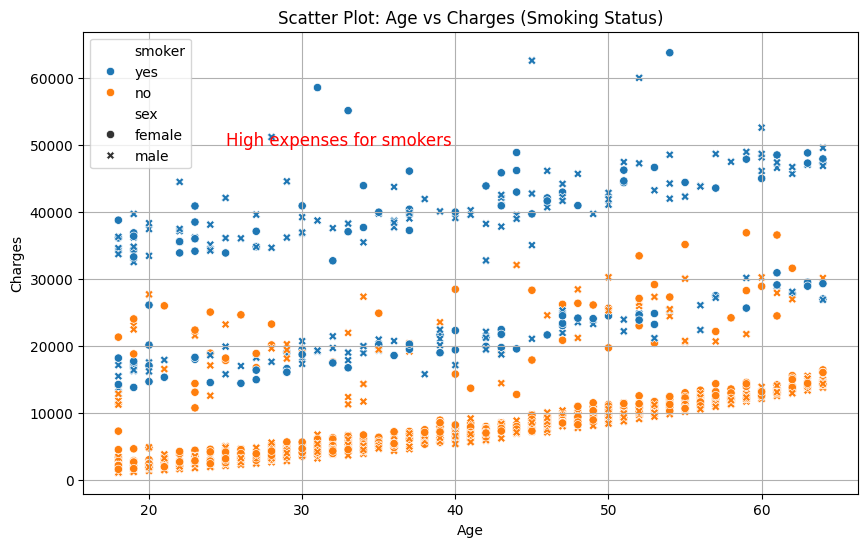

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['expenses'], hue=data['smoker'], style=data['sex'])
plt.title("Scatter Plot: Age vs Charges (Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.text(25, 50000, "High expenses for smokers", fontsize=12, color='red')
# plt.legend(title='Smoker')
plt.grid(True)
plt.show()


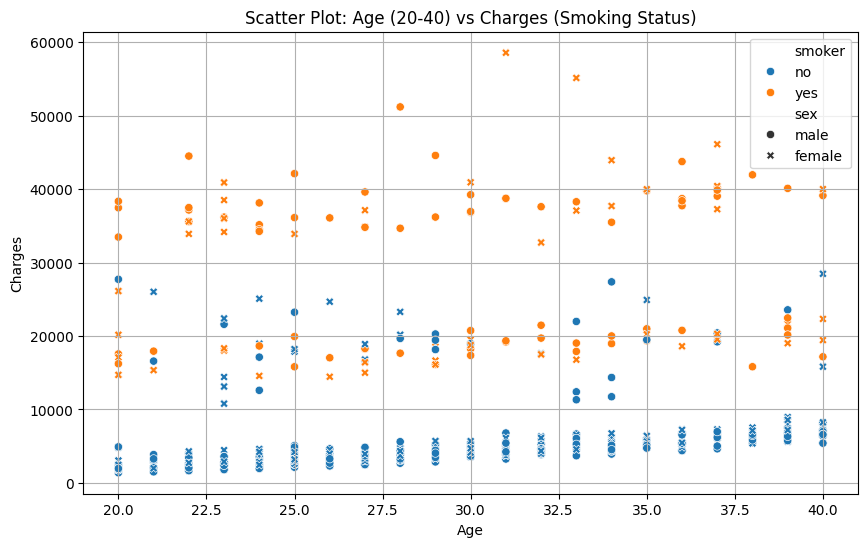

In [51]:
filtered_data = data[(data['age'] >= 20) & (data['age'] <= 40)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_data['age'], y=filtered_data['expenses'], hue=filtered_data['smoker'], style=filtered_data['sex'])
plt.title("Scatter Plot: Age (20-40) vs Charges (Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.grid(True)
plt.show()


Expenses by Smoking Status:
 smoker
no     8974061.63
yes    8781763.56
Name: expenses, dtype: float64


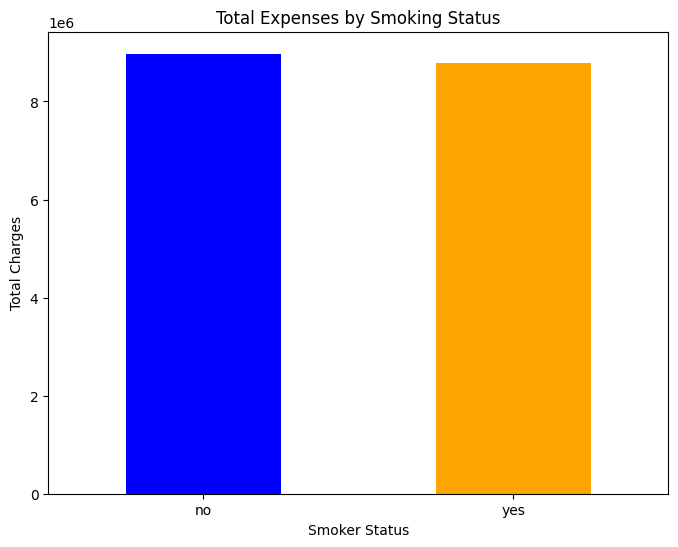

In [52]:
# Group by smoker status and calculate expenses
expenses = data.groupby('smoker')['expenses'].sum()
print("Expenses by Smoking Status:\n", expenses)

# Plot
expenses.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title("Total Expenses by Smoking Status")
plt.ylabel("Total Charges")
plt.xlabel("Smoker Status")
plt.xticks(rotation=0)
plt.show()


Number of Smokers by Gender:
 sex
female    115
male      159
Name: smoker, dtype: int64


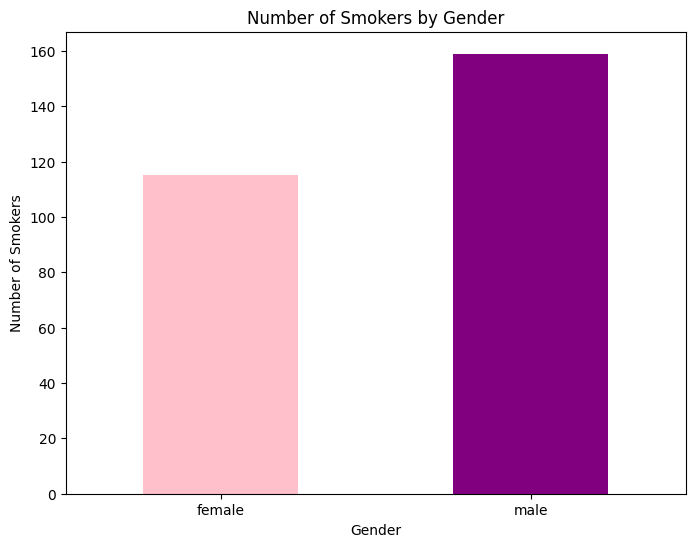

In [53]:
# Count smokers by gender
smokers_gender = data[data['smoker'] == 'yes'].groupby('sex')['smoker'].count()
print("Number of Smokers by Gender:\n", smokers_gender)

# Plot
smokers_gender.plot(kind='bar', color=['pink', 'purple'], figsize=(8, 6))
plt.title("Number of Smokers by Gender")
plt.ylabel("Number of Smokers")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()


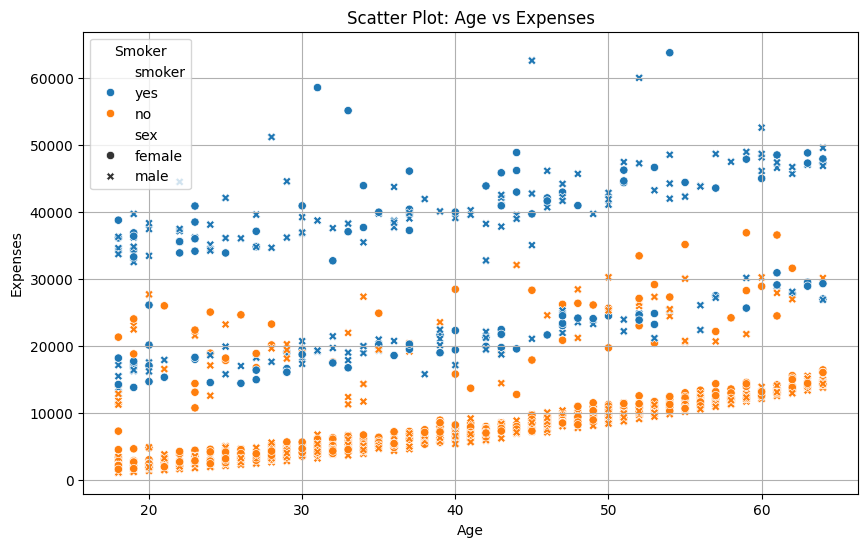

In [54]:
plt.figure(figsize=(10, 6))

# Scatter plot: Age vs Expenses
sns.scatterplot(x=data['age'], y=data['expenses'], hue=data['smoker'], style=data['sex'])
plt.title("Scatter Plot: Age vs Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend(title='Smoker')
plt.grid(True)
plt.show()


In [55]:

teenage_smokers = data[(data['age'] >= 13) & (data['age'] <= 19 ) & (data['smoker'] == 'yes')]

count_teenage_smokers = len(teenage_smokers)
print(f"Number of teenage smokers: {count_teenage_smokers}")


Number of teenage smokers: 30
